In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize

## Đọc dữ liệu 

In [2]:
product=pd.read_csv('Product.csv',index_col=0)

In [3]:
product.head(5)

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370 entries, 0 to 4369
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4370 non-null   int64  
 1   name         4370 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4370 non-null   float64
 4   price        4370 non-null   int64  
 5   list_price   4370 non-null   int64  
 6   brand        4370 non-null   object 
 7   group        4370 non-null   object 
 8   url          4370 non-null   object 
 9   image        4370 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 375.5+ KB


In [5]:
STOP_WORD_FILE = 'vietnamese-stopwords.txt'

In [6]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

In [7]:
product['name_description']=product['name'] + product['description']

In [8]:
# word_tokenize
product['name_desc_wt'] = product['name_description'].apply(lambda x: word_tokenize(x,format = 'text'))

In [9]:
product.head(5)

,item_id,name,description,rating,price,list_price,brand,group,url,image,name_description,name_desc_wt
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,Tai_nghe Bluetooth_Inpods 12 - Cảm_biến vân ta...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,Tai nghe bluetooth không dây F9 True wireless ...,Tai_nghe bluetooth không dây F9_True wireless ...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,Chuột Không Dây Logitech_M331_Silent - Hàng Ch...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,Loa Bluetooth_5.0_Kiêm Đồng_Hồ Báo_Thức - [ [ ...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,Tai_Nghe Bluetooth_Apple_AirPods_Pro_True_Wire...


## Cosine 

In [10]:
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words=stop_words)
tfidf_matrix = tf.fit_transform(product['name_desc_wt'])

In [11]:
cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_similarities

array([[1.        , 0.36131179, 0.08053821, ..., 0.01781428, 0.00962734,
        0.05741302],
       [0.36131179, 1.        , 0.08326394, ..., 0.01520767, 0.02756314,
        0.08717942],
       [0.08053821, 0.08326394, 1.        , ..., 0.03605742, 0.02343697,
        0.06565407],
       ...,
       [0.01781428, 0.01520767, 0.03605742, ..., 1.        , 0.0063396 ,
        0.03203321],
       [0.00962734, 0.02756314, 0.02343697, ..., 0.0063396 , 1.        ,
        0.04106875],
       [0.05741302, 0.08717942, 0.06565407, ..., 0.03203321, 0.04106875,
        1.        ]])

In [44]:
def recommend_content_based(id,df,n):
    results = {}
    for idx, row in product.iterrows():
        similar_indices = cosine_similarities[idx].argsort()[-(n+1):-1]
        similar_items = [(cosine_similarities[idx][i]) for i in similar_indices]
        similar_items = [(cosine_similarities[idx][i], product['item_id'][i]) for i in similar_indices]
        results[row['item_id']] = similar_items[0:]
        return results

In [58]:
def recommend_system_CB(df):
    idx = int(input('Nhập id sản phẩm: '))
    num = int(input('Nhập số sản phẩm mà bạn muốn được đề xuất: '))
    if idx in df['item_id']:
        print('Sản phẩm này không tồn tại')
    else:
        results=recommend_content_based(idx,df,num)
        print('\n','Đây là',num,'sản phẩm được đề xuất cho bạn')
        print('-'*30)
        recs = results[idx]
        for rec in recs:
            print('product ID:',rec[1],':',product.loc[product['item_id']==rec[1]]['name'].to_list()[0],'\n')

In [59]:
recommend_system_CB(product)

Nhập id sản phẩm: 48102821
Nhập số sản phẩm mà bạn muốn được đề xuất: 5

 Đây là 5 sản phẩm được đề xuất cho bạn
------------------------------
product ID: 56885678 : Tai Nghe Bluetooth TWS F9 Tai Nghe Nhét  Hai Tai  Bluetooth 5.0  True wireless   Cảm Ứng Vân Tay, Nút Bấm Chống Nước Dock Sạc Dự Phòng   + Túi đựng tai nghe  

product ID: 72928043 : Tai Nghe Bluetooth Amoi F9 kèm Củ Sạc 1A và Cáp Sạc cho Dock Sạc 3500mAh- Hàng Chính Hãng 

product ID: 50319688 : Tai Nghe Bluetooth Mini I12 Tws V5.0 (Trắng) Nút Cảm Ứng, Có Pop-Up, Tương Thích Với Các Dòng Smartphone, Tích Hợp Mic Nói Chuyện Điện Thoại, Đi Kèm Dock Sạc Dự Phòng, Âm Bass Sống Động – Hàng Chính Hãng 

product ID: 22413470 : Tai Nghe Bluetooth Air.podes Cảm Ứng Công Nghệ Cao 5.0 

product ID: 56365197 : Tai nghe bluetooth không dây i12 TWS 5.0, thiết kế nhỏ gọn, chất lượng âm thanh nổi HIFI, chức năng giảm tạp âm 



## WordCloud

In [60]:
from wordcloud import WordCloud

In [61]:
def get_text(df,id,n):
    results=recommend_content_based(idx,df,n)
    lst = [r[1] for r in results[id]] + [id]
    text = (df[df['item_id'].isin(lst)])
    return ' '.join(text.name+text.description)

In [62]:
text= get_text(product,48102821,5)

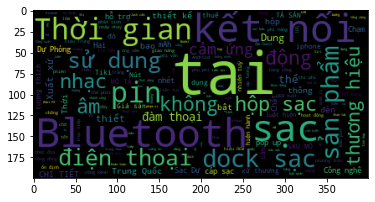

In [66]:
wc = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(wc)

Nhận xét:
* Kết quả của Cosine rất tốt, hầu như các kết quả đề xuất cùng là dòng sản phẩm tai nghe bluetooth

# gensim

In [68]:
from gensim import corpora, models, similarities
import jieba 
import re

In [69]:
# Tokenize(split the sentences into words)
products_gem = [[text for text in x.split()] for x in product.name_desc_wt]

In [70]:
len(products_gem)

4370

In [71]:
products_gem[:1]

[['Tai_nghe',
  'Bluetooth_Inpods',
  '12',
  '-',
  'Cảm_biến',
  'vân',
  'tay',
  ',',
  'chống',
  'nước',
  ',',
  'màu_sắc',
  'đa_dạng',
  '-',
  '5',
  'màu_sắc',
  'lựa',
  'chọnTHÔNG',
  'TIN',
  'CHI_TIẾT',
  'Dung_lượng',
  'pin',
  '300',
  'Thời_gian',
  'pin',
  '-',
  'Thời_gian',
  'nghe',
  'nhạc',
  'liên_tục',
  'từ',
  '2.5',
  '-',
  '4',
  'h',
  '-',
  'Thời_gian',
  'sạc',
  'đầy',
  'chỉ',
  'khoảng',
  '60',
  'p',
  '-',
  'Thời_gian',
  'chờ',
  'lên',
  'tới',
  '140',
  'giờ',
  'Bluetooth',
  '5',
  'Thương_hiệu',
  'OEM',
  'Xuất_xứ',
  'thương_hiệu',
  'Trung_Quốc',
  'Độ',
  'nhạy_cảm_biến',
  'vân',
  'tay',
  'Model',
  'i12',
  'Loại',
  'Jack',
  'cắm',
  'USB_Cable',
  'Trọng_lượng',
  '300',
  'g',
  'Thời_gian',
  'sử_dụng',
  '-',
  'Thời_gian',
  'nghe',
  'nhạc',
  'liên_tục',
  'từ',
  '2.5',
  '-',
  '4',
  'h',
  'SKU',
  '4096608751631',
  'MÔ_TẢ',
  'SẢN_PHẨM',
  'INPOD_12',
  'là',
  'phiên_bản',
  'nâng_cấp',
  'mới',
  'nhất',
  ',',

In [72]:
# remove some special elements in texts
products_gem_re = [[re.sub('[0-9]+','', e) for e in text] for text in products_gem] # số
products_gem_re = [[t.lower() for t in text if not t in ['', ' ', ',', '.', '...', '-',':', ';', '?', '%', '(', ')', '+', '/']] for text in  products_gem_re] # ký tự đặc biệt
products_gem_re = [[t for t in text if not t in stop_words] for text in products_gem_re] # stopword

In [74]:
products_gem_re[:1]

[['tai_nghe',
  'bluetooth_inpods',
  'cảm_biến',
  'vân',
  'chống',
  'màu_sắc',
  'đa_dạng',
  'màu_sắc',
  'lựa',
  'chọnthông',
  'chi_tiết',
  'dung_lượng',
  'pin',
  'pin',
  'nhạc',
  'liên_tục',
  'h',
  'sạc',
  'p',
  'chờ',
  'bluetooth',
  'thương_hiệu',
  'oem',
  'xuất_xứ',
  'thương_hiệu',
  'trung_quốc',
  'độ',
  'nhạy_cảm_biến',
  'vân',
  'model',
  'jack',
  'cắm',
  'usb_cable',
  'trọng_lượng',
  'g',
  'nhạc',
  'liên_tục',
  'h',
  'sku',
  'mô_tả',
  'sản_phẩm',
  'inpod_',
  'phiên_bản',
  'nâng_cấp',
  'tai_nghe',
  'bluetooth_.',
  'thiết_kế',
  'tỉ_lệ',
  'chuẩn',
  'tai',
  'airpod',
  'hãng',
  'lược_bỏ',
  'nút',
  'bấm',
  'thân',
  'tai',
  'thay',
  'nút',
  'cảm_ứng',
  'dễ_dàng',
  'thuận_tiện',
  'thao_tác',
  'nhạc',
  'dễ_dàng',
  'chạm',
  'bluetooth_.',
  'kết_nối',
  'vô_cùng',
  'ổn_định',
  'bluetooth_.',
  'kết_nối',
  'vô_cùng',
  'ổn_định',
  'tai',
  'kết_nối',
  'dock',
  'sạc',
  'chất',
  'âm',
  'thời_lượng',
  'pin',
  'cải_thiện'

In [75]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
dictionary = corpora.Dictionary(products_gem_re)

In [76]:
# List of features in dictionary
dictionary.token2id

{'._v': 0,
 'airpod': 1,
 'apple': 2,
 'bao_gồm': 3,
 'bluetooth': 4,
 'bluetooth_.': 5,
 'bluetooth_inpods': 6,
 'bấm': 7,
 'chi_phí': 8,
 'chi_tiết': 9,
 'chuẩn': 10,
 'chạm': 11,
 'chất': 12,
 'chọnthông': 13,
 'chống': 14,
 'chờ': 15,
 'cải_thiện': 16,
 'cảm_biến': 17,
 'cảm_ứng': 18,
 'cắm': 19,
 'cồng_kềnh': 20,
 'dock': 21,
 'dung_lượng': 22,
 'dễ_dàng': 23,
 'g': 24,
 'giao': 25,
 'giá': 26,
 'h': 27,
 'hiện_hành': 28,
 'huawei': 29,
 'hàng': 30,
 'hãng': 31,
 'inpod_': 32,
 'jack': 33,
 'kết_nối': 34,
 'lenovo': 35,
 'liên_tục': 36,
 'luật': 37,
 'lược_bỏ': 38,
 'lựa': 39,
 'model': 40,
 'màu_sắc': 41,
 'mô_tả': 42,
 'nhạc': 43,
 'nhạy_cảm_biến': 44,
 'nâng_cấp': 45,
 'nút': 46,
 'oem': 47,
 'oppo': 48,
 'p': 49,
 'phiên_bản': 50,
 'phát_sinh': 51,
 'phí': 52,
 'phương_thức': 53,
 'phụ_phí': 54,
 'pin': 55,
 'samsung': 56,
 'sku': 57,
 'sạc': 58,
 'sản_phẩm': 59,
 'tablet': 60,
 'tai': 61,
 'tai_nghe': 62,
 'thao_tác': 63,
 'thay': 64,
 'thiết_bị': 65,
 'thiết_kế': 66,
 'thuận

In [77]:
# Numbers of features (word) in dictionary
feature_cnt = len(dictionary)

In [78]:
feature_cnt

40898

In [79]:
# Obtain corpus based on dictionary (dense matrix)
corpus = [dictionary.doc2bow(text) for text in products_gem_re]

In [80]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 3),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 2),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 2),
 (22, 1),
 (23, 2),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 3),
 (28, 1),
 (29, 1),
 (30, 2),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 3),
 (35, 1),
 (36, 3),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 2),
 (42, 1),
 (43, 4),
 (44, 1),
 (45, 1),
 (46, 2),
 (47, 1),
 (48, 1),
 (49, 2),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 4),
 (56, 1),
 (57, 1),
 (58, 5),
 (59, 3),
 (60, 1),
 (61, 3),
 (62, 3),
 (63, 1),
 (64, 1),
 (65, 2),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 2),
 (84, 2),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 2)]

In [81]:
# Use TF-IDF to process corpus, obtaining index
tfidf = models.TfidfModel(corpus)
# Tính toán sự tương tự trong ma trận thưa thớt
index = similarities.SparseMatrixSimilarity(tfidf[corpus],
                                           num_features = feature_cnt)

In [108]:
def rec_gensim(id,dictionary,tfidf,index,n):
    product_selection = product.loc[product['item_id']==id]
    name_description_pre = product_selection['name_desc_wt'].to_string(index=False)
    print('Sản phẩm hiện tại là:',name_description_pre)
    view_product = name_description_pre.lower().split()
    # Convert search words into Sparse Vectors
    kw_vector = dictionary.doc2bow(view_product)
    # similarity calculation
    sim = index[tfidf[kw_vector]]
    
    lst_id=[]
    lst_score=[]
    for i in range(len(sim)):
        lst_id.append(i)
        lst_score.append(sim[i])
        
    df_result=pd.DataFrame({'id':lst_id,'score':lst_score})
    df_result = df_result.sort_values(by='score',ascending=False)
    
    highest_score = df_result.head(n+1)
    id_to_list = list(highest_score['id'])
    
    product_find=product[product.index.isin(id_to_list)]
    results = product_find[['item_id','name','description']]
    results=pd.concat([results,highest_score['score']],axis=1).sort_values(by='score',ascending=False)
    print('Đây là ',n,'sản phẩm được đề xuất cho bạn.')
    return results[1:]

In [109]:
result=rec_gensim(48102821,dictionary,tfidf,index,5)
result

Sản phẩm hiện tại là:  Tai_nghe Bluetooth_Inpods 12 - Cảm_biến vân ta...
Đây là  5 sản phẩm được đề xuất cho bạn.


,item_id,name,description,score
75,35607267,Tai nghe Bluetooth Inpods 12 Thời trang,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nSKU 13278...,0.225438
23,35373097,Tai Nghe Bluetooth True Wireless AMOI F9 5.0 C...,THÔNG TIN CHI TIẾT\nThương hiệu AMOI\nXuất xứ ...,0.144536
719,48273751,Tai nghe Blutooth 5.0 kiêm dock sạc dự phòng- ...,THÔNG TIN CHI TIẾT\nDung lượng pin 1200\nThời ...,0.129233
587,79965318,Tai nghe Bluetooth Lanith – Tai Nghe Không Dây...,THÔNG TIN CHI TIẾT\nThương hiệu LANITH\nXuất x...,0.126589
245,58291928,Tai Nghe True Wireless Earbuds QCY T7 Bluetoot...,THÔNG TIN CHI TIẾT\nThương hiệu QCY\nXuất xứ t...,0.125166


In [112]:
wctext = ' '.join(result.name + result.description)

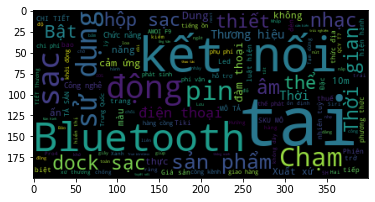

In [113]:
wc = WordCloud(stopwords=stop_words).generate(wctext)
plt.imshow(wc)

Nhận xét:
* Kết quả của gensim cũng tốt tương tự cosine vì kết quả đề xuất cũng tương đồng với sản phẩm 